In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

In [5]:
train_df = pd.read_csv('/titanic_train.csv')
test_df = pd.read_csv('/titanic_test.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
 train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
train_df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


In [11]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
train_df.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train_df.groupby(['Sex'], as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train_df.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train_df.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [16]:
train_df['Family_Size'] = train_df['SibSp']+train_df['Parch']+1
test_df['Family_Size'] = train_df['SibSp']+train_df['Parch']+1

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
train_df.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [19]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Medium', 5: 'Medium', 6: 'Large', 7: 'Large', 8:'Large'}
train_df['Family_Size_Group'] = train_df['Family_Size'].map(family_map)
test_df['Family_Size_Group'] = train_df['Family_Size'].map(family_map)

In [20]:
train_df.groupby(['Family_Size_Group'], as_index=False)['Survived'].mean()

,Family_Size_Group,Survived
0,Alone,0.303538
1,Large,0.175000
2,Medium,0.545455
3,Small,0.562738


In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone


In [22]:
train_df.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


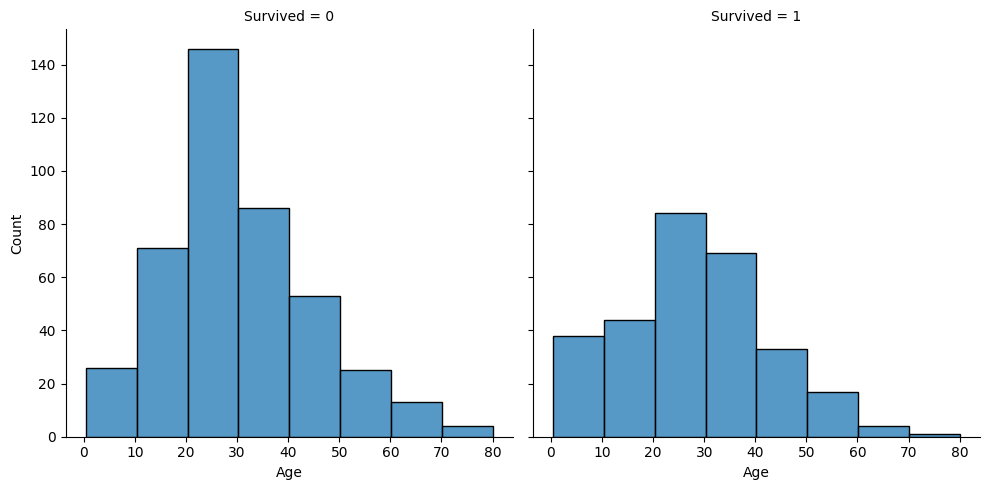

In [23]:
sns.displot(train_df, x='Age', col='Survived', binwidth=10, height=5)

In [24]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut']= pd.qcut(train_df['Age'], 8)

In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


In [26]:
train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()

<ipython-input-26-9446e884d7ed>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Age_Cut'], as_index=False)['Survived'].mean()


,Age_Cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [27]:
train_df.loc[train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 20.125), 'Age'] = 1
train_df.loc[(train_df['Age'] > 20.125) & (train_df['Age'] <= 24), 'Age'] = 2
train_df.loc[(train_df['Age'] > 24) & (train_df['Age'] <= 28), 'Age'] = 3
train_df.loc[(train_df['Age'] > 28) & (train_df['Age'] <= 32.312), 'Age'] = 4
train_df.loc[(train_df['Age'] > 32.312) & (train_df['Age'] <= 38), 'Age'] = 5
train_df.loc[(train_df['Age'] > 38) & (train_df['Age'] <= 47), 'Age'] = 6
train_df.loc[(train_df['Age'] > 47) & (train_df['Age'] <= 80), 'Age'] = 7
train_df.loc[train_df['Age'] > 80, 'Age']

test_df.loc[test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 20.125), 'Age'] = 1
test_df.loc[(test_df['Age'] > 20.125) & (test_df['Age'] <= 24), 'Age'] = 2
test_df.loc[(test_df['Age'] > 24) & (test_df['Age'] <= 28), 'Age'] = 3
test_df.loc[(test_df['Age'] > 28) & (test_df['Age'] <= 32.312), 'Age'] = 4
test_df.loc[(test_df['Age'] > 32.312) & (test_df['Age'] <= 38), 'Age'] = 5
test_df.loc[(test_df['Age'] > 38) & (test_df['Age'] <= 47), 'Age'] = 6
test_df.loc[(test_df['Age'] > 47) & (test_df['Age'] <= 80), 'Age'] = 7
test_df.loc[test_df['Age'] > 80, 'Age']

,Age


In [28]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,Small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,Small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,Small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,Alone,"(32.312, 38.0]"


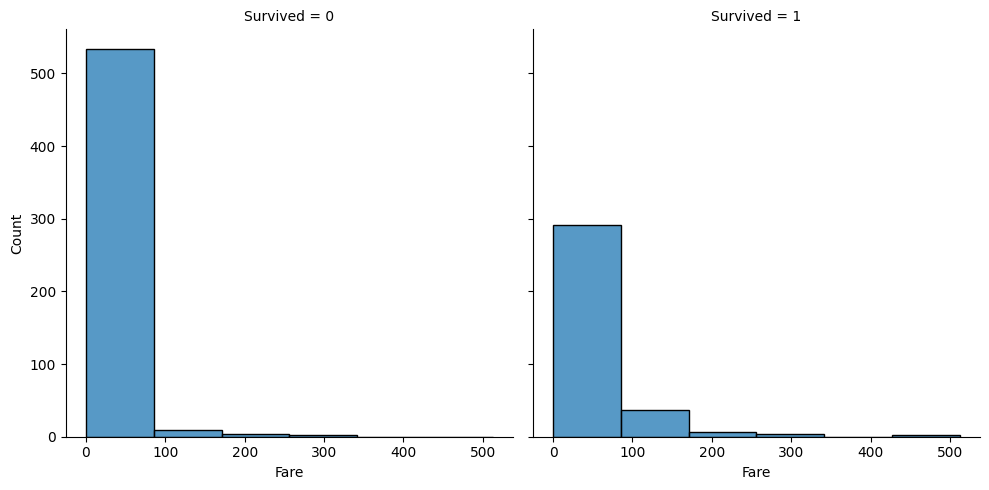

In [29]:
sns.displot(train_df, x='Fare', col = 'Survived', binwidth = 80, height = 5)

In [30]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 6)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 6)

In [31]:
train_df.groupby(train_df['Fare_Cut'], as_index=False)['Survived'].mean()

<ipython-input-31-ddf748e090df>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(train_df['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [32]:
# train_df.loc[train_df['Fare'] <= 7.775, 'Fare'] = 0
# train_df.loc[(train_df['Fare'] > 7.775) & (train_df['Fare'] <= 8.662), 'Fare'] = 1
# train_df.loc[(train_df['Fare'] > 8.662) & (train_df['Fare'] <= 14.454), 'Fare'] = 2
# train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 26.0), 'Fare'] = 3
# train_df.loc[(train_df['Fare'] > 26.0) & (train_df['Fare'] <= 52.369), 'Fare'] = 4
# train_df.loc[(train_df['Fare'] > 52.369) & (train_df['Fare'] <= 512.329), 'Fare'] = 5
# train_df.loc[train_df['Fare'] > 512.329, 'Fare']

# test_df.loc[test_df['Fare'] <= 7.775, 'Fare'] = 0
# test_df.loc[(test_df['Fare'] > 7.775) & (test_df['Fare'] <= 8.662), 'Fare'] = 1
# test_df.loc[(test_df['Fare'] > 8.662) & (test_df['Fare'] <= 14.454), 'Fare'] = 2
# test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 26.0), 'Fare'] = 3
# test_df.loc[(test_df['Fare'] > 26.0) & (test_df['Fare'] <= 52.369), 'Fare'] = 4
# test_df.loc[(test_df['Fare'] > 52.369) & (test_df['Fare'] <= 512.329), 'Fare'] = 5
# test_df.loc[test_df['Fare'] > 512.329, 'Fare']

F_bins = [-0.001,7.775,8.662,14.454,26.0,52.369]
F_labels = [0,1,2,3,4]
train_df['Fare'] = pd.cut(train_df['Fare'], bins = F_bins, labels=F_labels)

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut,Fare_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,NaN,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,NaN,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]"


In [34]:
 train_df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [35]:
train_df['Title']= train_df['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x: x.strip())
test_df['Title']= test_df['Name'].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x: x.strip())
train_df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [36]:
train_df.groupby(['Title'], as_index = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [37]:
# military - Capt, Col, Major
# nobel - Lady, Sir, Don, Jonkheer, the Countess
# Unmarried Female - Mll,Ms,Mme

In [38]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col' : 'Military',
    'Major': 'Military',
    'Jonkheer':'Nobel',
    'the Countess': 'Nobel',
    'Don': 'Nobel',
    'Lady': 'Nobel',
    'Sir': 'Nobel',
    'Mlle': 'Nobel',
    'Ms': 'Nobel',
    'Mme': 'Nobel'
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col' : 'Military',
    'Major': 'Military',
    'Jonkheer':'Nobel',
    'the Countess': 'Nobel',
    'Don': 'Nobel',
    'Lady': 'Nobel',
    'Sir': 'Nobel',
    'Mlle': 'Nobel',
    'Ms': 'Nobel',
    'Mme': 'Nobel'
})

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut,Fare_Cut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,NaN,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,NaN,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr


In [40]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Nobel,9,0.777778
7,Rev,6,0.000000


In [41]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x : len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x : len(x))

In [42]:
train_df['Name_Length']

,Name_Length
0,23
1,51
2,22
3,44
4,24
...,...
886,21
887,28
888,40
889,21


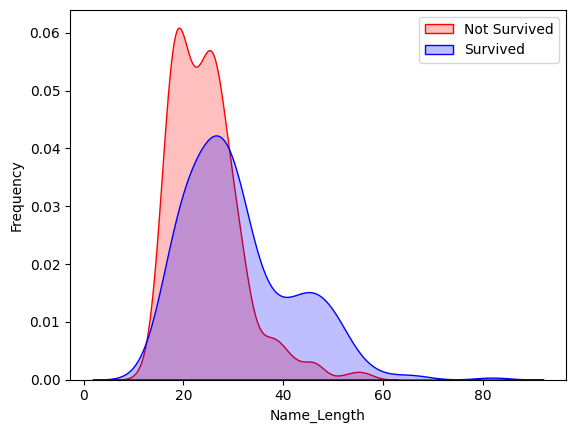

In [43]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color = 'Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())],ax=g ,color = 'Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [44]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 8)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 8)
type(train_df['Name_LengthGB'])

pandas.core.series.Series

In [45]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

<ipython-input-45-4ec6b044a4f7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [46]:
N_bins = [11.999,18.0,20.0,23.0,25.0,27.25,30.0,38.0,82.0]
N_labels = [0,1,2,3,4,5,6,7]
train_df['Name_Size'] = pd.cut(train_df['Name_Length'], bins = N_bins, labels=N_labels)

In [47]:
train_df.groupby(['Name_LengthGB'], as_index = False)['Survived'].agg(['count', 'mean'])

<ipython-input-47-31977d68dcba>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index = False)['Survived'].agg(['count', 'mean'])


,Name_LengthGB,count,mean
0,"(11.999, 18.0]",140,0.214286
1,"(18.0, 20.0]",103,0.252427
2,"(20.0, 23.0]",117,0.307692
3,"(23.0, 25.0]",98,0.346939
4,"(25.0, 27.25]",99,0.292929
5,"(27.25, 30.0]",112,0.428571
6,"(30.0, 38.0]",116,0.517241
7,"(38.0, 82.0]",106,0.745283


In [48]:
train_df[train_df['Name_Size'] == 7][['Name','Title']]

,Name,Title
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs
18,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",Mrs
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",Mrs
...,...,...
862,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",Mrs
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",Mrs
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",Mrs
880,"Shelley, Mrs. William (Imanita Parrish Hall)",Mrs


In [49]:
# (train_df[(train_df['Name_Size'] == 7 & train_df['Title'] == 'Mrs')]).shape[0]
train_df[(train_df['Name_Size'] == 7) & (train_df['Title'] == 'Mrs')].shape[0]
# (test_df[(test_df['Name_Size'] == 7) & (test_df['Title'] == 'Mrs')]).shape[0]


83

In [50]:
train_df[train_df['Title'] == 'Mrs'].groupby((train_df['Name_Size']==7), as_index = False)['Survived'].agg(['count', 'mean'])

,Name_Size,count,mean
0,False,42,0.809524
1,True,83,0.783133


In [51]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Size_Group,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0,NaN,S,2,Small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,NaN,C85,C,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1,NaN,S,1,Alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,NaN,C123,S,2,Small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1,NaN,S,1,Alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3


In [52]:
train_df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [53]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [54]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [55]:
train_df['TicketNumber'][94]

'364500'

In [56]:
# tickets_1601 = train_df[train_df['TicketNumber'] == 1601]['Title'].unique()
# print(tickets_1601)

In [57]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

,TicketNumber
0,1
1,1
2,1
3,2
4,1
...,...
886,1
887,1
888,2
889,1


In [58]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [59]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending = False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [60]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [61]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat = " ", expand = True)[1].notna(), train_df['Ticket'].str.split(pat = " ", expand = True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat = " ", expand = True)[1].notna(), test_df['Ticket'].str.split(pat = " ", expand = True)[0].apply(lambda x: x.strip()), 'Blank')
# test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [62]:
train_df['TicketLocation'].value_counts()

,count
TicketLocation,
Blank,665
PC,60
C.A.,27
STON/O,12
A/5,10
W./C.,9
CA.,8
SOTON/O.Q.,8
SOTON/OQ,7


In [63]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'CA.':'CA',
    'C.A.':'CA',
    'SC/PARIS':'SC/Paris',
   ' S.C./PARIS':'SC/Paris',
    'A/4.': 'A/4',
    'A/5.':'A/5',
    'A.5':'A/5',
    'A./5':'A/5',
    'W./C.':'W/C'
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'CA.':'CA',
    'C.A.':'CA',
    'SC/PARIS':'SC/Paris',
   ' S.C./PARIS':'SC/Paris',
    'A/4.': 'A/4',
    'A/5.':'A/5',
    'A.5':'A/5',
    'A./5':'A/5',
    'W./C.':'W/C'
})

In [64]:
train_df.groupby(['TicketLocation'], as_index = False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A./5.,2,0.000000
1,A.5.,2,0.000000
2,A/4,6,0.000000
3,A/5,17,0.117647
4,A/S,1,0.000000
5,A4.,1,0.000000
6,Blank,665,0.383459
7,C,5,0.400000
8,C.A./SOTON,1,0.000000
9,CA,41,0.341463


In [65]:
train_df['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


In [66]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [67]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [68]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [69]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [70]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,NaN,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,NaN,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7,113803,2,Blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3,373450,1,Blank,0


In [71]:
train_df.shape

(891, 24)

In [72]:
test_df.shape

(418, 22)

In [73]:
# CLEANING CODE

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 714 non-null    float64 
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                742 non-null    category
 10  Cabin               891 non-null    object  
 11  Embarked            889 non-null    object  
 12  Family_Size         891 non-null    int64   
 13  Family_Size_Group   884 non-null    object  
 14  Age_Cut             714 non-null    category
 15  Fare_Cut            891 non-null    cate

In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         418 non-null    int64   
 1   Pclass              418 non-null    int64   
 2   Name                418 non-null    object  
 3   Sex                 418 non-null    object  
 4   Age                 332 non-null    float64 
 5   SibSp               418 non-null    int64   
 6   Parch               418 non-null    int64   
 7   Ticket              418 non-null    object  
 8   Fare                417 non-null    float64 
 9   Cabin               418 non-null    object  
 10  Embarked            418 non-null    object  
 11  Family_Size         418 non-null    int64   
 12  Family_Size_Group   414 non-null    object  
 13  Age_Cut             335 non-null    category
 14  Fare_Cut            417 non-null    category
 15  Title               418 non-null    obje

In [76]:
train_df[train_df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1,...,NaN,"(7.775, 8.662]",Mr,16,"(11.999, 18.0]",0,330877,1,Blank,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2,...,NaN,"(8.662, 14.454]",Mr,28,"(27.25, 30.0]",5,244373,1,Blank,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,0,...,NaN,"(-0.001, 7.775]",Mrs,23,"(20.0, 23.0]",2,2649,1,Blank,0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,0,...,NaN,"(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2,2631,1,Blank,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,1,...,NaN,"(7.775, 8.662]",Miss,29,"(27.25, 30.0]",5,330959,1,Blank,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,0,...,NaN,"(-0.001, 7.775]",Mr,16,"(11.999, 18.0]",0,2629,1,Blank,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,NaN,...,NaN,"(52.369, 512.329]",Miss,33,"(30.0, 38.0]",6,2343,7,CA,0
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2,...,NaN,"(8.662, 14.454]",Mr,27,"(25.0, 27.25]",4,345777,1,Blank,0
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,1,...,NaN,"(7.775, 8.662]",Mr,18,"(11.999, 18.0]",0,349217,1,Blank,0


In [77]:
# train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
# test_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
# test_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

In [78]:
train_df['Age']

,Age
0,2.0
1,5.0
2,3.0
3,5.0
4,5.0
...,...
886,3.0
887,1.0
888,NaN
889,3.0


In [79]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Family_Size,Name_Length,TicketNumberCounts,Cabin_Assigned
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,3.462185,0.523008,0.381594,1.904602,26.965208,1.794613,0.228956
std,257.353842,0.486592,0.836071,2.316318,1.102743,0.806057,1.613459,9.281607,1.362175,0.420397
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,1.250000,0.000000,0.000000,1.000000,20.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,25.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,5.000000,1.000000,0.000000,2.000000,30.000000,2.000000,0.000000
max,891.000000,1.000000,3.000000,7.000000,8.000000,6.000000,11.000000,82.000000,7.000000,1.000000


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [84]:
train_df_len = len(train_df)
train = train_df[:train_df_len]
X_train = train.drop(labels =  "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(X_test))

X_train 596
X_test 295
y_train 596
y_test 295


In [88]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer # Importing SimpleImputer for imputation
from sklearn.pipeline import Pipeline

# Assuming your dataframe is named 'train_df' and target variable is 'Survived'

# Identify categorical and numerical features
categorical_features = ['Sex', 'Embarked', 'Title', 'Family_Size_Group', 'TicketLocation', 'Cabin', 'Name_LengthGB', 'TicketNumber']  # Add any other categorical features
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Name_Length', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size']  # Add any other numerical features

# Create a ColumnTransformer to apply OneHotEncoding to categorical features and passthrough for numerical features
# Adding SimpleImputer to handle NaN values in numerical and categorical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # Imputing numerical NaN with mean
    ('num', 'passthrough')
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputing categorical NaN with most frequent value
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)])

# Split data into training and testing sets
train_df_len = len(train_df)
train = train_df[:train_df_len]
X_train = train.drop(labels="Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

# Create a pipeline with the preprocessor and LogisticRegression model
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])

# Fit the pipeline to the training data
logreg_pipeline.fit(X_train, y_train)

# Evaluate the model
acc_log_train = round(logreg_pipeline.score(X_train, y_train) * 100, 2)
acc_log_test = round(logreg_pipeline.score(X_test, y_test) * 100, 2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 89.09
Testing Accuracy: % 82.03


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
